## STEP 3: PROCESS

### Preparing the Environment

In [1]:
#Importing python packages

import numpy as np # data arrays
import pandas as pd # data structures and analysis
import matplotlib as plt # data visualisation
import datetime as dt # date and time

from plotnine import *  # geom plots from R 
from plotnine.data import *

%matplotlib inline


In [2]:
!pip install plotnine

### Importing 3 datasets

In [12]:
# daily_activity  -  read_csv function to read the required CSV file

daily_activity = pd.read_csv(r"C:\Users\nadia\OneDrive\Desktop\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")

In [13]:
# sleep_day  -  read_csv function to read the required CSV file

sleep_day = pd.read_csv(r"C:\Users\nadia\OneDrive\Desktop\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")

In [14]:
# weight - read_csv function to read the required CSV file

weight = pd.read_csv(r"C:\Users\nadia\OneDrive\Desktop\Fitabase Data 4.12.16-5.12.16\weightLogInfo_merged.csv")

In [15]:
hourly_steps = pd.read_csv(r"C:\Users\nadia\OneDrive\Desktop\Fitabase Data 4.12.16-5.12.16\hourlySteps_merged.csv")

### Data Cleaning & Manipulation 

**Steps**

- Observe and familiarize with data

- Check for null or missing values

- Perform sanity check of data

- Previewing using head function to show the first 10 rows of daily_activity to familiarise with the data.

**1. Data Frame - daily_activity**

In [16]:
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [17]:
# obtain the # of missing data points per column

null_values_count = daily_activity.isnull().sum()

In [18]:
# checking for duplicates

duplicates = daily_activity.duplicated().sum()

print('Number of duplicates: ' + str(duplicates))

Number of duplicates: 0


In [19]:
null_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [20]:
# to check the data types of columns

daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Finding out the basic information of daily_activity:


-  no. of rows and columns
-  name of columns
-  type of value


In [21]:
# To get the info of the data frame

daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [22]:
# number of rows and columns 

daily_activity.shape

(940, 15)

In [23]:
unique_id =len(pd.unique(daily_activity['Id']))

print(" Number of unique id: "  + str(unique_id))

 Number of unique id: 33


From the above observation, noted that

1.  There is no typo, Null or missing values.


2.  Data frame has 940 rows and 15 columns.


3.  ActivityDate is wrongly classified as object dtype and has to be converted to datetime64 dtype.


4.  There are 33 unique IDs, instead of 30 unique IDs as expected from 30 fitness tracker users.

In [24]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [25]:
# checking the data types of columns

daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

From the above observation, noted that 

1. There is no typo, null or missing values


2. Data Frame has 940 rows and 15 columns.


3. *ActivityDate* is wrongly classified as object dtype and has to be converted to 
   datetime64 dtype 


4. There are 33 unique IDs, instead of 30 unique IDs as expected from 30 fitness tracker users 


The following data manipulation has to be performed:


1. Convert the *ActivityDate* to datetime64 dtype.


2. Convert format of *ActivityDate* to yyyy-mm-dd


3. Create new column *DayOfTheWeek* by seperating the date into day of the week for further analysis


4. Create new column *TotalMins* being the sum of *VeryActiveMinutes*, *FairlyActiveMinutes*,
   *LightlyActiveMinutes* and *SedentaryMinutes*


5. Create new column *TotalHours* by converting new column in *TotalMins* to *NumberOfHours*


6. Rearrange and rename columns.



In [26]:
#Convert the ActivityDate to datetime64 dtype.


daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

In [27]:
#Checking the data type of column

daily_activity['ActivityDate']

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: ActivityDate, Length: 940, dtype: datetime64[ns]

In [28]:
daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [29]:
# create new list of rearranged columns

new_cols = ['Id', 'ActivityDate','DayOfWeek' , 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes','TotalExerciseMinutes','TotalExerciseHours', 'Calories']


#  reindex function to rearrange columns based on "new_cols"

df_activity = daily_activity.reindex(columns = new_cols) 


In [30]:
df_activity.head()

,Id,ActivityDate,DayOfWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [31]:
df_activity.head()

,Id,ActivityDate,DayOfWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


Creating new column by seperating the date into day of the week for further analysis

In [32]:
# create new column "day_of_the_week" to represent day of the week 

df_activity['DayOfWeek']=df_activity['ActivityDate'].dt.day_name()

In [33]:
# print 1st 5 rows to confirm
df_activity.head()

,Id,ActivityDate,DayOfWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


Rearranging and renaming columns from XxxYyy to xxx_yyy.


In [34]:
df_activity = df_activity.rename(columns ={"Id":"id","ActivityDate":"date","DayOfWeek":"day_of_the_Week","TotalSteps":"total_steps","TotalDistance":"total_dist","TrackerDistance":"tracker_dist","LoggedActivitiesDistance":"logged_activities_dist","VeryActiveDistance":"very_active_dist","ModeratelyActiveDistance":"moderately_active_dist","LightActiveDistance":"light_active_dist","SedentaryActiveDistance":"sedentary_active_dist","VeryActiveMinutes":"very_active_mins","FairlyActiveMinutes":"fairly_active_mins","LightlyActiveMinutes":"lightly_active_mins","SedentaryMinutes":"sedentary_mins","TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"})

# print column names to confirm
print(df_activity.columns.values)
df_activity.head(5)

['id' 'date' 'day_of_the_Week' 'total_steps' 'total_dist' 'tracker_dist'
 'logged_activities_dist' 'very_active_dist' 'moderately_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_Week,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


Creating new column total_mins being the sum of total time logged.

In [35]:
# create new column "total_mins" containing sum of total minutes.

df_activity['total_mins'] = df_activity['very_active_mins'] + df_activity['fairly_active_mins'] + df_activity['lightly_active_mins'] +  df_activity['sedentary_mins']

In [36]:
df_activity.head()

,id,date,day_of_the_Week,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,NaN,1863


Creating new column by converting total_mins to number of hours

In [37]:
# inserting data into total hours by calculating 

df_activity['total_hours']= round(df_activity['total_mins'] / 60)

In [38]:
df_activity.head()

,id,date,day_of_the_Week,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,17.0,1863


Data cleaning and manipulation is completed for the *DailyActivity Dataframe*. Hence, data is now ready to be analysed.

**2. Data Frame - sleep_day**

In [39]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [40]:
# Checking if there are duplicates in this data frame

sleep_day.duplicated().sum()

print("Number of duplicates: " + str(sleep_day.duplicated().sum()))

Number of duplicates: 3


In [41]:
# Duplicates dropped

sleep_day = sleep_day.drop_duplicates()

# checking 

sleep_day.duplicated().sum()

0

In [42]:
# Checking for null records

null_values_count =  sleep_day.isnull().sum()

In [43]:
# Checking the number of null records in the data frame's columns 

null_values_count[:]


Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

Finding out the basic information of daily_activity:

- no. of rows and columns
- name of columns
- type of value

In [44]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  410 non-null    int64 
 1   SleepDay            410 non-null    object
 2   TotalSleepRecords   410 non-null    int64 
 3   TotalMinutesAsleep  410 non-null    int64 
 4   TotalTimeInBed      410 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.2+ KB


In [45]:
sleep_day.shape

(410, 5)

In [46]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [47]:
sleep_day.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [48]:
sleep_day.nunique()

Id                     24
SleepDay               31
TotalSleepRecords       3
TotalMinutesAsleep    256
TotalTimeInBed        242
dtype: int64

From the above observation, noted that

- There were duplicates, Null or missing values which has been dropped and removed 


- Data frame has 410 rows and 5 columns.


- SleepDay is wrongly classified as object dtype and has to be converted to datetime64 dtype.


- There are 24 unique IDs, instead of 30 unique IDs as expected from 30 fitness tracker users.

The following data manipulation has to be performed:

- Convert the SleepDay to datetime64 dtype.



- Convert format of SleepDay to yyyy-mm-dd.



- Create new column DayOfTheWeek by seperating the date into day of the week for further analysis



- Rearrange and rename columns.

In [49]:
sleep_day['SleepDay']

0      4/12/2016 12:00:00 AM
1      4/13/2016 12:00:00 AM
2      4/15/2016 12:00:00 AM
3      4/16/2016 12:00:00 AM
4      4/17/2016 12:00:00 AM
               ...          
408    4/30/2016 12:00:00 AM
409     5/1/2016 12:00:00 AM
410     5/2/2016 12:00:00 AM
411     5/3/2016 12:00:00 AM
412     5/4/2016 12:00:00 AM
Name: SleepDay, Length: 410, dtype: object

In [50]:
sleep_day[:]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [51]:
# Converting the SleepDay column data type 'O' to datetime

sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'] )

In [52]:
#Converting the date into day of week column 

sleep_day['day_of_the_week'] = sleep_day['SleepDay'].dt.day_name()

sleep_day[:]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_the_week
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday
...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,Saturday
409,8792009665,2016-05-01,1,503,527,Sunday
410,8792009665,2016-05-02,1,415,423,Monday
411,8792009665,2016-05-03,1,516,545,Tuesday


In [53]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_the_week
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [54]:
# Rearranging the columns 


new_cols = ['Id', 'SleepDay','day_of_the_week','TotalSleepRecords' , 'TotalMinutesAsleep', 'TotalTimeInBed']


#  reindex function to rearrange columns based on "new_cols"

sleep_day = sleep_day.reindex(columns = new_cols) 


In [55]:
sleep_day[:]

,Id,SleepDay,day_of_the_week,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,Tuesday,1,327,346
1,1503960366,2016-04-13,Wednesday,2,384,407
2,1503960366,2016-04-15,Friday,1,412,442
3,1503960366,2016-04-16,Saturday,2,340,367
4,1503960366,2016-04-17,Sunday,1,700,712
...,...,...,...,...,...,...
408,8792009665,2016-04-30,Saturday,1,343,360
409,8792009665,2016-05-01,Sunday,1,503,527
410,8792009665,2016-05-02,Monday,1,415,423
411,8792009665,2016-05-03,Tuesday,1,516,545


In [56]:
#Renaming the columns


sleep_day = sleep_day.rename(columns ={"Id":"id","SleepDay":"date","day_of_the_week":"day_of_the_Week","TotalSleepRecords":"total_sleep_records","TotalMinutesAsleep":"total_mins_asleep","TotalTimeInBed":"total_time_inbed"})

# print column names to confirm
print(sleep_day.columns.values)
sleep_day.head(5)

['id' 'date' 'day_of_the_Week' 'total_sleep_records' 'total_mins_asleep'
 'total_time_inbed']


,id,date,day_of_the_Week,total_sleep_records,total_mins_asleep,total_time_inbed
0,1503960366,2016-04-12,Tuesday,1,327,346
1,1503960366,2016-04-13,Wednesday,2,384,407
2,1503960366,2016-04-15,Friday,1,412,442
3,1503960366,2016-04-16,Saturday,2,340,367
4,1503960366,2016-04-17,Sunday,1,700,712


In [57]:
#creating a column for awake time


sleep_day['awake_time'] = sleep_day['total_time_inbed'] - sleep_day['total_mins_asleep']

sleep_day

,id,date,day_of_the_Week,total_sleep_records,total_mins_asleep,total_time_inbed,awake_time
0,1503960366,2016-04-12,Tuesday,1,327,346,19
1,1503960366,2016-04-13,Wednesday,2,384,407,23
2,1503960366,2016-04-15,Friday,1,412,442,30
3,1503960366,2016-04-16,Saturday,2,340,367,27
4,1503960366,2016-04-17,Sunday,1,700,712,12
...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,Saturday,1,343,360,17
409,8792009665,2016-05-01,Sunday,1,503,527,24
410,8792009665,2016-05-02,Monday,1,415,423,8
411,8792009665,2016-05-03,Tuesday,1,516,545,29


Data cleaning and manipulation is completed for the *SleepDay Dataframe*. Hence, data is now ready to be analysed.

**3. Data Frame - Weight**

In [58]:
weight.head(15)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
5,4319703577,4/17/2016 11:59:59 PM,72.400002,159.614681,25.0,27.450001,True,1460937599000
6,4319703577,5/4/2016 11:59:59 PM,72.300003,159.394222,NaN,27.379999,True,1462406399000
7,4558609924,4/18/2016 11:59:59 PM,69.699997,153.662190,NaN,27.250000,True,1461023999000
8,4558609924,4/25/2016 11:59:59 PM,70.300003,154.984977,NaN,27.459999,True,1461628799000
9,4558609924,5/1/2016 11:59:59 PM,69.900002,154.103125,NaN,27.320000,True,1462147199000


In [59]:
# checking for null values

null_values = weight.isnull().sum()

We will leave the NA. The NA belong to "Fat" data of different dates.

In [60]:
null_values[:]

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [61]:
# checking for duplicates

weight.duplicated().sum()

0

In [62]:
# number of rows and columns

weight.shape

(67, 8)

In [63]:
# deriving information

weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [64]:
weight.nunique()

Id                 8
Date              56
WeightKg          34
WeightPounds      34
Fat                2
BMI               36
IsManualReport     2
LogId             56
dtype: int64

From the above observation, noted that

- There were no duplicates, Null or missing values will be ignored because of the vast number of other data that could 
   be of use for further analysis
   
   
- Data frame has 67 rows and 8 columns.


- Date is wrongly classified as object dtype and has to be converted to datetime64 dtype.


- There are 8 unique IDs, instead of 30 unique IDs as expected from 30 fitness tracker users.


- Day of the week column should be created from Date column


The following data manipulation has to be performed:

- Convert the Date to datetime64 dtype.


- Convert format of Date to yyyy-mm-dd.


- Create new column DayOfTheWeek by seperating the date into day of the week for further analysis


- Rearrange and rename columns.


- After the Time column is created . Remove the time series from the Date column

In [65]:
weight[:]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [66]:
#Converting dtype 'O' to 'datetime64'

weight['Date'] = pd.to_datetime(weight['Date'] )

In [67]:
weight['Date'] = pd.to_datetime(weight['Date'], format ="%m/%d/%Y")

In [68]:
weight.dtypes

Id                         int64
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
dtype: object

In [69]:
weight[:]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [70]:
# creating a colum for day of the week

weight['day_of_the_week'] = weight['Date'].dt.day_name()

weight[:]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,day_of_the_week
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000,Monday
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000,Tuesday
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000,Wednesday
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000,Thursday
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000,Thursday
...,...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,NaN,25.440001,False,1462517015000,Friday
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,NaN,25.559999,False,1462692953000,Sunday
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,NaN,25.610001,False,1462775984000,Monday
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,NaN,25.559999,False,1462949507000,Wednesday


In [71]:
#Creating a time column from the Date column

weight['time'] = weight['Date'].dt.time

weight

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,day_of_the_week,time
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000,Monday,23:59:59
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000,Tuesday,23:59:59
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000,Wednesday,01:08:52
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000,Thursday,23:59:59
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000,Thursday,23:59:59
...,...,...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,NaN,25.440001,False,1462517015000,Friday,06:43:35
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,NaN,25.559999,False,1462692953000,Sunday,07:35:53
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,NaN,25.610001,False,1462775984000,Monday,06:39:44
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,NaN,25.559999,False,1462949507000,Wednesday,06:51:47


In [72]:
weight

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,day_of_the_week,time
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000,Monday,23:59:59
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000,Tuesday,23:59:59
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000,Wednesday,01:08:52
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000,Thursday,23:59:59
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000,Thursday,23:59:59
...,...,...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,NaN,25.440001,False,1462517015000,Friday,06:43:35
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,NaN,25.559999,False,1462692953000,Sunday,07:35:53
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,NaN,25.610001,False,1462775984000,Monday,06:39:44
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,NaN,25.559999,False,1462949507000,Wednesday,06:51:47


In [73]:
# Removing the time stamp from the 'Date' column 


weight['Date'] = weight['Date'].dt.date
weight

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,day_of_the_week,time
0,1503960366,2016-05-02,52.599998,115.963147,22.0,22.650000,True,1462233599000,Monday,23:59:59
1,1503960366,2016-05-03,52.599998,115.963147,NaN,22.650000,True,1462319999000,Tuesday,23:59:59
2,1927972279,2016-04-13,133.500000,294.317120,NaN,47.540001,False,1460509732000,Wednesday,01:08:52
3,2873212765,2016-04-21,56.700001,125.002104,NaN,21.450001,True,1461283199000,Thursday,23:59:59
4,2873212765,2016-05-12,57.299999,126.324875,NaN,21.690001,True,1463097599000,Thursday,23:59:59
...,...,...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06,85.000000,187.392923,NaN,25.440001,False,1462517015000,Friday,06:43:35
63,8877689391,2016-05-08,85.400002,188.274775,NaN,25.559999,False,1462692953000,Sunday,07:35:53
64,8877689391,2016-05-09,85.500000,188.495234,NaN,25.610001,False,1462775984000,Monday,06:39:44
65,8877689391,2016-05-11,85.400002,188.274775,NaN,25.559999,False,1462949507000,Wednesday,06:51:47


In [74]:
# Rearranging the columns 


new_cols = ['Id', 'Date','day_of_the_week','WeightKg' , 'WeightPounds', 'Fat', 'BMI','IsManualReport','LogId','time']


#  reindex function to rearrange columns based on "new_cols"
weight = weight.reindex(columns = new_cols) 


In [75]:
#Renaming the columns

weight = weight.rename(columns ={"Id":"id","Date":"date","day_of_the_week":"day_of_the_Week","WeightKg":"weight_kg","WeightPounds":"weight_pounds","Fat":"fat","BMI":"bmi","IsManualReport":"is_manual_report","LogId":"log_id",'time':"time"})

# print column names to confirm
print(weight.columns.values)
weight.head(5)

['id' 'date' 'day_of_the_Week' 'weight_kg' 'weight_pounds' 'fat' 'bmi'
 'is_manual_report' 'log_id' 'time']


,id,date,day_of_the_Week,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time
0,1503960366,2016-05-02,Monday,52.599998,115.963147,22.0,22.650000,True,1462233599000,23:59:59
1,1503960366,2016-05-03,Tuesday,52.599998,115.963147,NaN,22.650000,True,1462319999000,23:59:59
2,1927972279,2016-04-13,Wednesday,133.500000,294.317120,NaN,47.540001,False,1460509732000,01:08:52
3,2873212765,2016-04-21,Thursday,56.700001,125.002104,NaN,21.450001,True,1461283199000,23:59:59
4,2873212765,2016-05-12,Thursday,57.299999,126.324875,NaN,21.690001,True,1463097599000,23:59:59


Data cleaning and manipulation is completed for the *Weight Dataframe*. Hence, data is now ready to be analysed.

### **3. Data Frame - Hourly Steps**

In [76]:
hourly_steps

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,514
22095,8877689391,5/12/2016 11:00:00 AM,1407
22096,8877689391,5/12/2016 12:00:00 PM,3135
22097,8877689391,5/12/2016 1:00:00 PM,307


In [77]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [78]:
hourly_steps

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,514
22095,8877689391,5/12/2016 11:00:00 AM,1407
22096,8877689391,5/12/2016 12:00:00 PM,3135
22097,8877689391,5/12/2016 1:00:00 PM,307


In [79]:
# Rearranging the columns 


new_cols = ['Id', 'ActivityHour','StepTotal','hour' ]


#  reindex function to rearrange columns based on "new_cols"

hourly_steps = hourly_steps.reindex(columns = new_cols) 

In [80]:
hourly_steps

,Id,ActivityHour,StepTotal,hour
0,1503960366,4/12/2016 12:00:00 AM,373,NaN
1,1503960366,4/12/2016 1:00:00 AM,160,NaN
2,1503960366,4/12/2016 2:00:00 AM,151,NaN
3,1503960366,4/12/2016 3:00:00 AM,0,NaN
4,1503960366,4/12/2016 4:00:00 AM,0,NaN
...,...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,514,NaN
22095,8877689391,5/12/2016 11:00:00 AM,1407,NaN
22096,8877689391,5/12/2016 12:00:00 PM,3135,NaN
22097,8877689391,5/12/2016 1:00:00 PM,307,NaN


In [81]:
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

In [82]:
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'],format = '%d/%m/%y %H:%M:%S')

In [90]:
hourly_steps

,Id,ActivityHour,StepTotal,hour
0,1503960366,2016-04-12 00:00:00,373,0
1,1503960366,2016-04-12 01:00:00,160,1
2,1503960366,2016-04-12 02:00:00,151,2
3,1503960366,2016-04-12 03:00:00,0,3
4,1503960366,2016-04-12 04:00:00,0,4
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514,10
22095,8877689391,2016-05-12 11:00:00,1407,11
22096,8877689391,2016-05-12 12:00:00,3135,12
22097,8877689391,2016-05-12 13:00:00,307,13


In [91]:
# inserting hour values using dt.hour


hourly_steps['hour'] = hourly_steps['ActivityHour'].dt.hour

In [92]:
hourly_steps

,Id,ActivityHour,StepTotal,hour
0,1503960366,2016-04-12 00:00:00,373,0
1,1503960366,2016-04-12 01:00:00,160,1
2,1503960366,2016-04-12 02:00:00,151,2
3,1503960366,2016-04-12 03:00:00,0,3
4,1503960366,2016-04-12 04:00:00,0,4
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514,10
22095,8877689391,2016-05-12 11:00:00,1407,11
22096,8877689391,2016-05-12 12:00:00,3135,12
22097,8877689391,2016-05-12 13:00:00,307,13


In [93]:
hourly_steps.dtypes

Id                       int64
ActivityHour    datetime64[ns]
StepTotal                int64
hour                     int64
dtype: object

Data cleaning and manipulation is completed for the Weight Dataframe. Hence, data is now ready to be analysed.

### Merging 3 dataframes into one single data frame 

In [222]:
merged1 = pd.merge(df_activity, sleep_day, on= 'id')

In [223]:
merged_data = pd.merge(merged1, weight, on ='id')

In [224]:
merged_data.columns

Index(['id', 'date_x', 'day_of_the_Week_x', 'total_steps', 'total_dist',
       'tracker_dist', 'logged_activities_dist', 'very_active_dist',
       'moderately_active_dist', 'light_active_dist', 'sedentary_active_dist',
       'very_active_mins', 'fairly_active_mins', 'lightly_active_mins',
       'sedentary_mins', 'total_mins', 'total_hours', 'calories', 'date_y',
       'day_of_the_Week_y', 'total_sleep_records', 'total_mins_asleep',
       'total_time_inbed', 'awake_time', 'date', 'day_of_the_Week',
       'weight_kg', 'weight_pounds', 'fat', 'bmi', 'is_manual_report',
       'log_id', 'time'],
      dtype='object')

In [180]:
merged_data

,id,date_x,day_of_the_Week_x,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,...,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time,underweight_range,healthy_weight_range,obeseweight_range
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,52.599998,115.963147,22.0,22.650000,True,1462233599000,23:59:59,NaN,NaN,NaN
1,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,52.599998,115.963147,NaN,22.650000,True,1462319999000,23:59:59,NaN,NaN,NaN
2,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,52.599998,115.963147,22.0,22.650000,True,1462233599000,23:59:59,NaN,NaN,NaN
3,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,52.599998,115.963147,NaN,22.650000,True,1462319999000,23:59:59,NaN,NaN,NaN
4,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,52.599998,115.963147,22.0,22.650000,True,1462233599000,23:59:59,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33697,6962181067,2016-05-12,Thursday,3587,2.37,2.37,0.0,0.00,0.25,2.11,...,61.200001,134.922906,NaN,23.889999,True,1462751999000,23:59:59,NaN,NaN,NaN
33698,6962181067,2016-05-12,Thursday,3587,2.37,2.37,0.0,0.00,0.25,2.11,...,62.400002,137.568455,NaN,24.350000,True,1462838399000,23:59:59,NaN,NaN,NaN
33699,6962181067,2016-05-12,Thursday,3587,2.37,2.37,0.0,0.00,0.25,2.11,...,62.099998,136.907061,NaN,24.240000,True,1462924799000,23:59:59,NaN,NaN,NaN
33700,6962181067,2016-05-12,Thursday,3587,2.37,2.37,0.0,0.00,0.25,2.11,...,61.900002,136.466144,NaN,24.170000,True,1463011199000,23:59:59,NaN,NaN,NaN


## Perform calculations

-   count - no. of rows
-   mean (average)
-   std (standard deviation)
-   min and max
-   percentiles 25%, 50%, 75%

## 1. Analytical findings - General Statistics

In [97]:
# pull general statistics 

df_activity.describe()

,id,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000




**Interpreting statistical findings:**

1.  On average, users logged 7,637 steps or 5.4km which is not adequate. As recommended by CDC, an adult female has to aim at       least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. Source: Medical News     Today article

2.  Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.



3.  Noting that average calories burned is 2,303 calories equivalent to 0.6 pound. Could not interpret into detail as calories       burned depend on several factors such as the age, weight, daily tasks, exercise, hormones and daily calorie intake. Source:     Health Line article



## 2. Analytical findings - General Statistics on the Merged Data

In [98]:
merged_data.describe()

,id,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,...,calories,total_sleep_records,total_mins_asleep,total_time_inbed,awake_time,weight_kg,weight_pounds,fat,bmi,log_id
count,3.370200e+04,33702.000000,33702.000000,33702.000000,33702.000000,33702.000000,33702.000000,33702.000000,33702.000000,33702.000000,...,33702.000000,33702.000000,33702.000000,33702.000000,33702.000000,33702.000000,33702.000000,1581.000000,33702.000000,3.370200e+04
mean,6.474278e+09,9656.934930,6.490486,6.433641,0.276905,1.612673,0.912832,3.941401,0.005795,23.727286,...,2011.015667,1.091953,437.455492,456.271468,18.815975,62.849395,138.559198,23.529412,24.399954,1.461797e+12
std,1.326641e+09,3917.366741,2.670941,2.620098,0.934911,1.516937,0.784924,1.364677,0.024006,23.960270,...,382.641675,0.374875,85.671183,89.113600,12.142193,7.258473,16.002193,1.500186,1.912757,7.753381e+08
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,59.000000,65.000000,2.000000,52.599998,115.963147,22.000000,22.650000,1.460506e+12
25%,6.962181e+09,5908.000000,3.910000,3.910000,0.000000,0.000000,0.190000,3.240000,0.000000,0.000000,...,1850.000000,1.000000,411.000000,424.000000,12.000000,61.200001,134.922906,22.000000,23.889999,1.461024e+12
50%,6.962181e+09,10320.000000,6.820000,6.820000,0.000000,1.200000,0.680000,3.910000,0.000000,18.000000,...,2039.000000,1.000000,442.000000,457.000000,16.000000,61.500000,135.584291,25.000000,24.000000,1.461888e+12
75%,6.962181e+09,12207.000000,8.350000,8.130000,0.000000,3.020000,1.680000,4.880000,0.000000,38.000000,...,2173.000000,1.000000,476.000000,497.000000,24.000000,61.900002,136.466144,25.000000,24.170000,1.462406e+12
max,6.962181e+09,20031.000000,13.240000,13.240000,4.081692,7.650000,2.390000,7.700000,0.110000,210.000000,...,4552.000000,3.000000,750.000000,775.000000,72.000000,133.500000,294.317120,25.000000,47.540001,1.463098e+12


**Interpreting statistical findings:**

-  Avg weight is 139 pounds with BMI of 24 and burn 2011 calories.


-  Avg steps is 9656, max is almost triple that 20031 steps. 


-  Users spend on avg 12 hours a day in sedentary minutes, 4 hours lightly active, only half hour in fairly+very active!


-   Users also gets about 7 hour of sleep.

## 3. Analytical Findings - Sleep patterns 

In [99]:
sleep_day.describe()

,id,total_sleep_records,total_mins_asleep,total_time_inbed,awake_time
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927,39.309756
std,2.060863e+09,0.346636,118.635918,127.455140,46.710932
min,1.503960e+09,1.000000,58.000000,61.000000,0.000000
25%,3.977334e+09,1.000000,361.000000,403.750000,17.000000
50%,4.702922e+09,1.000000,432.500000,463.000000,25.500000
75%,6.962181e+09,1.000000,490.000000,526.000000,40.000000
max,8.792010e+09,3.000000,796.000000,961.000000,371.000000


**Interpreting statistical findings:**


- Participants spent, on average, 458.6 minutes (7.64 hours) in bed.


- Average sleeping time was 419.5 minutes or 7 hours.


- Participants slept once per day on average.

In [100]:
sleep_day

,id,date,day_of_the_Week,total_sleep_records,total_mins_asleep,total_time_inbed,awake_time
0,1503960366,2016-04-12,Tuesday,1,327,346,19
1,1503960366,2016-04-13,Wednesday,2,384,407,23
2,1503960366,2016-04-15,Friday,1,412,442,30
3,1503960366,2016-04-16,Saturday,2,340,367,27
4,1503960366,2016-04-17,Sunday,1,700,712,12
...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,Saturday,1,343,360,17
409,8792009665,2016-05-01,Sunday,1,503,527,24
410,8792009665,2016-05-02,Monday,1,415,423,8
411,8792009665,2016-05-03,Tuesday,1,516,545,29


## 4. Analytical Findings - Number of users that are active 

**Analysis on active minutes, calorie, total steps.**

- The **American Heart Association** and **World Health Organization** recommend at least 150 minutes of moderate-intensity
  activity or 75 minutes of vigorous activity, or a combination of both, each week. 
- That means it needs an daily goal 
  of 21.4 minutes of FairlyActiveMinutes or 10.7 minutes of VeryActiveMinutes
  
  
- In our dataset, **30 users** met fairly active minutes or very active minutes.

In [101]:
active_mins = df_activity[(df_activity['fairly_active_mins'] >= 21) | 
                          (df_activity['very_active_mins'] >= 11)].groupby('id').count()

In [102]:
active_mins

,date,day_of_the_Week,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
id,,,,,,,,,,,,,,,,,
1503960366,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
1624580081,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1644430081,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
1927972279,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2022484408,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
2320127002,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2347167796,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2873212765,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
3372868164,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


## 5. Analytical Findings - Calculated the percentages of various minutes

In [103]:
# percentage of sedentary percentage

sedentary_percentage = (df_activity['sedentary_mins'].sum() / df_activity['total_mins'].sum()*100)

sedentary_percentage

81.32989068004622

In [104]:
# percentage of lightly_percentage

lightly_percentage = (df_activity['lightly_active_mins'].sum() / df_activity['total_mins'].sum()*100)

lightly_percentage

15.820493214202166

In [105]:
# percentage of Fairly_percentage

fairly_percentage = (df_activity['fairly_active_mins'].sum() / df_activity['total_mins'].sum() * 100)


fairly_percentage

1.1130139975629088

In [106]:
# percentage of Active_percentage

active_percentage = (df_activity['very_active_mins'].sum() / df_activity['total_mins'].sum() * 100)


active_percentage

1.7366021081886964

created a new data frame and inserted the two columns into it for the purpose of pie chart

In [107]:
data = {'level': ['Sedentary', 'Lightly', 'Fairly', 'Very Active'],
        'Minutes': [sedentary_percentage, lightly_percentage, fairly_percentage, active_percentage]}

In [108]:
df = pd.DataFrame(data)

In [109]:
df.head()

,level,Minutes
0,Sedentary,81.329891
1,Lightly,15.820493
2,Fairly,1.113014
3,Very Active,1.736602


Check to see if we have 30 users using n_distinct(). The dataset has 33 user data from daily activity, 
24 from sleep and only 8 from weight. If there is a discrepency such as in the weight table, check to see how
the data are recorded. The way the user record the data may give you insight on why there is missing data.

In [110]:
weight[weight['is_manual_report'] != 'False'].groupby(id).sum().nunique()

id                   8
weight_kg           34
weight_pounds       34
fat                  3
bmi                 36
is_manual_report     2
log_id              56
dtype: int64

In [111]:
merged_data[:]

,id,date_x,day_of_the_Week_x,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,...,awake_time,date,day_of_the_Week,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,19,2016-05-02,Monday,52.599998,115.963147,22.0,22.650000,True,1462233599000,23:59:59
1,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,19,2016-05-03,Tuesday,52.599998,115.963147,NaN,22.650000,True,1462319999000,23:59:59
2,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,23,2016-05-02,Monday,52.599998,115.963147,22.0,22.650000,True,1462233599000,23:59:59
3,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,23,2016-05-03,Tuesday,52.599998,115.963147,NaN,22.650000,True,1462319999000,23:59:59
4,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,30,2016-05-02,Monday,52.599998,115.963147,22.0,22.650000,True,1462233599000,23:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33697,6962181067,2016-05-12,Thursday,3587,2.37,2.37,0.0,0.00,0.25,2.11,...,19,2016-05-08,Sunday,61.200001,134.922906,NaN,23.889999,True,1462751999000,23:59:59
33698,6962181067,2016-05-12,Thursday,3587,2.37,2.37,0.0,0.00,0.25,2.11,...,19,2016-05-09,Monday,62.400002,137.568455,NaN,24.350000,True,1462838399000,23:59:59
33699,6962181067,2016-05-12,Thursday,3587,2.37,2.37,0.0,0.00,0.25,2.11,...,19,2016-05-10,Tuesday,62.099998,136.907061,NaN,24.240000,True,1462924799000,23:59:59
33700,6962181067,2016-05-12,Thursday,3587,2.37,2.37,0.0,0.00,0.25,2.11,...,19,2016-05-11,Wednesday,61.900002,136.466144,NaN,24.170000,True,1463011199000,23:59:59


## 6. Analytical findings - Number of users who's awake time exceeded 55 minutes

In [112]:
awake_time = sleep_day[sleep_day['awake_time'] >= 55].groupby('id').size().sort_values( ascending = False)

awake_time.nunique()


6

- According to article: https://blog.fitbit.com/sleep-    study/#:~:text=The%20average%20Fitbit%20user%20is,is%20spent%20restless%20or%20awake.&text=People%20who%20sleep%205%20hours,the%20beginning%20of%20the%20night. 



- 55 minutes are spend awake in bed before going to sleep. Let see how many users in our study is according to the FitBit data

## 7. Analytical Findigs - identifying Users that are Under weight, Healthy weight, Over weight or Obese using BMI

- **If your BMI is less than 18.5, it falls within the underweight range.**
- **If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.**
- **If your BMI is 25.0 to 29.9, it falls within the overweight range.**
- **If your BMI is 30.0 or higher, it falls within the obese range.**

**Underweight**

In [240]:
#underweight range.


underweight = merged_data[merged_data['bmi'] < 18.5 ].groupby('id').count()

underweight

,date_x,day_of_the_Week_x,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,...,awake_time,date,day_of_the_Week,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time
id,,,,,,,,,,,,,,,,,,,,,


**Analysis*

- There are no underweight user's

In [ ]:
underweight.to_csv('underweight_file.csv')


In [242]:
df_underweight = pd.read_csv(r"C:\Users\nadia\Downloads\underweight_file.csv")

**Healthy Weight**

In [259]:
# Healthy Weight range.


healthyweight = merged_data[merged_data['bmi'].between(18.5, 24.9)].groupby('id').count()

healthyweight

,date_x,day_of_the_Week_x,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,...,awake_time,date,day_of_the_Week,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time
id,,,,,,,,,,,,,,,,,,,,,
1503960366,1550,1550,1550,1550,1550,1550,1550,1550,1550,1550,...,1550,1550,1550,1550,1550,775,1550,1550,1550,1550
6962181067,28830,28830,28830,28830,28830,28830,28830,28830,28830,28830,...,28830,28830,28830,28830,28830,0,28830,28830,28830,28830


In [ ]:
healthyweight.to_csv('healthyweight_file.csv')

In [244]:
df_healthyweight = pd.read_csv(r"C:\Users\nadia\Downloads\healthyweight_file.csv")

In [258]:
healthyweight_analysis = df_healthyweight[(df_healthyweight['fairly_active_mins'] >= 21) | 
                          (df_healthyweight['very_active_mins'] >= 11)].groupby('id').nunique()
healthyweight_analysis

,Unnamed: 0,date_x,day_of_the_Week_x,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,...,awake_time,date,day_of_the_Week,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time
id,,,,,,,,,,,,,,,,,,,,,
1503960366,1500,30,7,30,28,28,1,27,26,28,...,17,2,2,1,1,1,1,1,2,1
6962181067,20460,22,6,22,22,22,4,22,19,22,...,21,30,7,12,12,0,12,1,30,1


**Analysis**

- The 2 user that has been found as obese does exercise that's required for them to maintain a healthy lifestyle

**Over Weight**

In [256]:
# overweight range.


overweight = merged_data[merged_data['bmi'].between(25.0, 29.0)].groupby('id').count()

overweight

,date_x,day_of_the_Week_x,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,...,awake_time,date,day_of_the_Week,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time
id,,,,,,,,,,,,,,,,,,,,,
4319703577,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,...,1612,1612,1612,1612,1612,806,1612,1612,1612,1612
4558609924,775,775,775,775,775,775,775,775,775,775,...,775,775,775,775,775,0,775,775,775,775
5577150313,780,780,780,780,780,780,780,780,780,780,...,780,780,780,780,780,0,780,780,780,780


In [ ]:
overweight.to_csv('overweight_file.csv')

In [245]:
df_overweight = pd.read_csv(r"C:\Users\nadia\Downloads\overweight_file.csv")

In [257]:
overweight_analysis = df_overweight[(df_overweight['fairly_active_mins'] >= 21) | 
                          (df_overweight['very_active_mins'] >= 11)].groupby('id').nunique()
overweight_analysis

,Unnamed: 0,date_x,day_of_the_Week_x,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,...,awake_time,date,day_of_the_Week,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time
id,,,,,,,,,,,,,,,,,,,,,
4319703577,364,7,4,7,7,7,1,7,7,7,...,20,2,2,2,2,1,2,1,2,1
4558609924,425,17,7,17,17,17,1,15,16,17,...,4,5,2,5,5,0,5,1,5,1
5577150313,728,28,7,28,28,28,1,28,27,25,...,19,1,1,1,1,0,1,1,1,1


**Analysis**

- The one user that has been found as obese does exercise that's required. 

**Obese weight**

In [254]:
#obese range.


obeseweight = merged_data[merged_data['bmi'] > 30.0].groupby('id').count()

obeseweight

,date_x,day_of_the_Week_x,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,...,awake_time,date,day_of_the_Week,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time
id,,,,,,,,,,,,,,,,,,,,,
1927972279,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,0,155,155,155,155


In [ ]:
obeseweight.to_csv('obeseweight_file.csv')


In [250]:
df_obeseweight = pd.read_csv(r"C:\Users\nadia\Downloads\obeseweight_file.csv")

-  The American Heart Association and World Health Organization recommend at least 150 minutes of moderate-intensity activity      or 75 minutes of vigorous activity, or a combination of both, each week.


-  That means it needs an daily goal of 21.4 minutes of FairlyActiveMinutes or 10.7 minutes of VeryActiveMinutes

In [253]:
obeseweight_analysis = df_obeseweight[(df_obeseweight['fairly_active_mins'] >= 21) | 
                          (df_obeseweight['very_active_mins'] >= 11)]
obeseweight_analysis

,Unnamed: 0,id,date_x,day_of_the_Week_x,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,...,awake_time,date,day_of_the_Week,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,time
95,1645,1927972279,2016-05-01,Sunday,2704,1.87,1.87,0.0,1.01,0.03,...,25,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52
96,1646,1927972279,2016-05-01,Sunday,2704,1.87,1.87,0.0,1.01,0.03,...,24,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52
97,1647,1927972279,2016-05-01,Sunday,2704,1.87,1.87,0.0,1.01,0.03,...,24,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52
98,1648,1927972279,2016-05-01,Sunday,2704,1.87,1.87,0.0,1.01,0.03,...,19,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52
99,1649,1927972279,2016-05-01,Sunday,2704,1.87,1.87,0.0,1.01,0.03,...,12,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52
100,1650,1927972279,2016-05-02,Monday,3790,2.62,2.62,0.0,1.16,0.30,...,25,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52
101,1651,1927972279,2016-05-02,Monday,3790,2.62,2.62,0.0,1.16,0.30,...,24,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52
102,1652,1927972279,2016-05-02,Monday,3790,2.62,2.62,0.0,1.16,0.30,...,24,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52
103,1653,1927972279,2016-05-02,Monday,3790,2.62,2.62,0.0,1.16,0.30,...,19,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52
104,1654,1927972279,2016-05-02,Monday,3790,2.62,2.62,0.0,1.16,0.30,...,12,2016-04-13,Wednesday,133.5,294.31712,NaN,47.540001,False,1460509732000,01:08:52


**Analysis**

- The one user that has been found as obese does exercise that's required. 

## STEP 5: SHARE

### Active Minutes:




Percentage of active minutes in the four categories: very active, fairly active, lightly active and sedentary.
From the pie chart, we can see that most users spent 81.3% of their daily activity in sedentary minutes and only 1.74% 
in very active minutes.

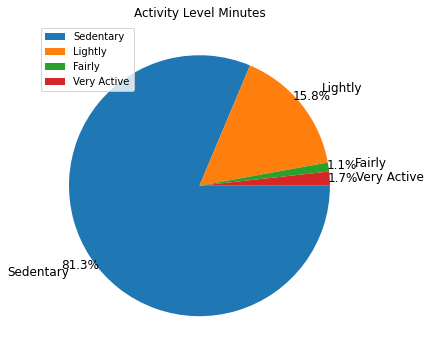

In [113]:
my_label = ['Sedentary', 'Lightly', 'Fairly', 'Very Active']

df.plot.pie(y='Minutes',figsize=(6,6),fontsize=12,legend = True, labels = my_label, counterclock = False,autopct = '%1.1f%%',
            pctdistance=1.1, labeldistance=1.2,title = 'Activity Level Minutes',ylabel = (" ") );


**Analysis**


As seen from the pie chart,


1. Sedentary minutes takes the biggest slice at 81.3%.


2. This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving    from one spot to another) or running errands.


3.  App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and         very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

In [114]:
df_activity.head()

,id,date,day_of_the_Week,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,17.0,1863


### Day Of Week VS Frequency of usage

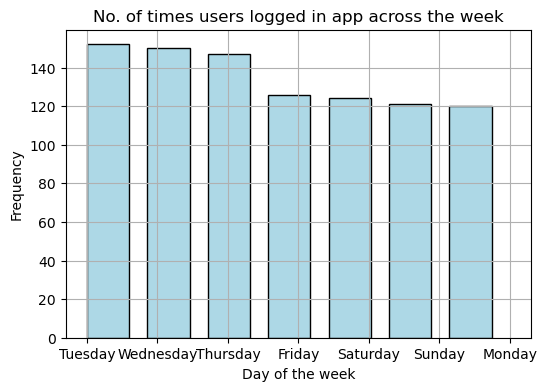

In [115]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df_activity.day_of_the_Week, bins = 7, 
         width = 0.6, color = "lightblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()



**Analysis**

**Frequency of usage across the week**


1.  In this histogram, we are looking at the frequency of FitBit app usage in terms of days of the week.


2.  We discovered that users prefer or remember (giving them the doubt of benefit that they forgotten) to track their activity       on the app during midweek from Tuesday to Friday.


3.  Noting that the frequency dropped on Friday and continue on weekends and Monday.

In [116]:
df_activity.describe()

,id,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


### Calories VS Total Steps Taken

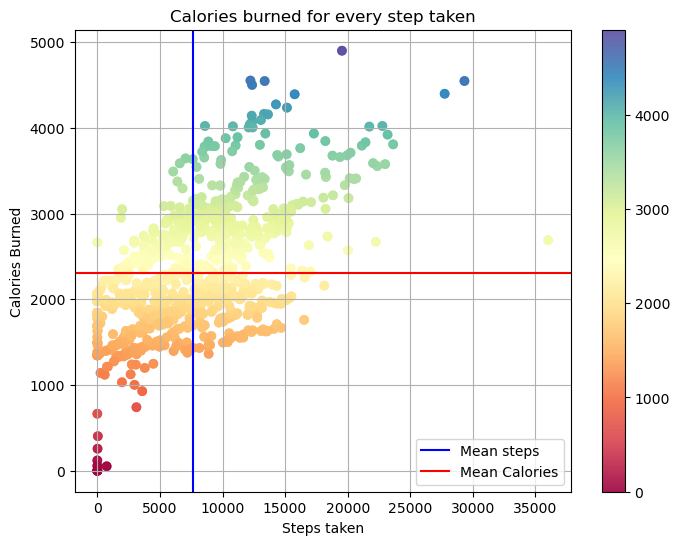

In [117]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df_activity.total_steps, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

mean_total_steps = 7638
mean_calories = 2303


plt.scatter(df_activity.total_steps,df_activity.calories,alpha = 0.9, c = df_activity.calories, 
            cmap = "Spectral")
plt.colorbar(orientation = "vertical")
plt.axvline(mean_total_steps, color = "Blue", label = "Mean steps")
plt.axhline(mean_calories, color = "Red", label = "Mean Calories")
plt.xlabel("Steps taken")
plt.ylabel("Calories Burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

**Analysis**

**Calories burned for every step taken**

From the scatter plot, we discovered that:

- Mean Calories = 2303
- Mean Total steps = 7637

1.  It is a positive correlation.


2. We observed that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories
   burn rate cooling down from 15,000 steps onwards.

Noted a few outliers:

1. Zero steps with zero to minimal calories burned.


2. 1 observation of > 35,000 steps with < 3,000 calories burned.


3. Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data
   collection (ie. miscalculations, data contamination or human error).

### Hours Logged VS Calories burned

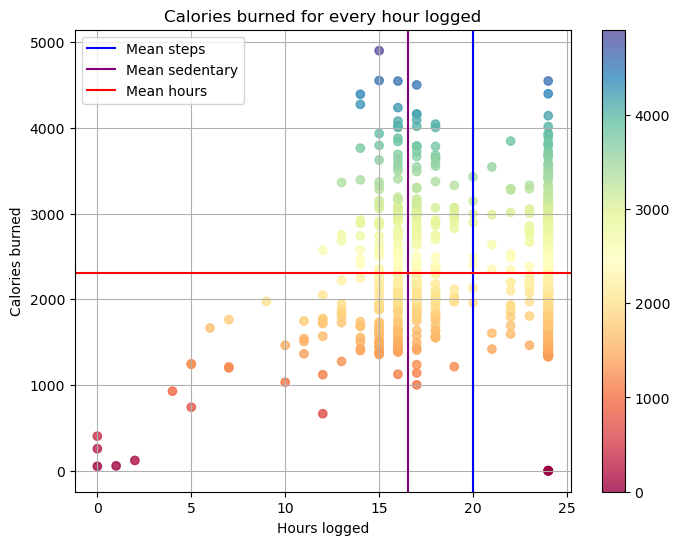

In [118]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df_activity.total_hours, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# adding annotations and visuals
mean_calories = 2303
mean_hours = 20
mean_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(mean_hours, color = "Blue", label = "Mean steps")
plt.axvline(mean_sedentary, color = "Purple", label = "Mean sedentary")
plt.axhline(mean_calories, color = "Red", label = "Mean hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

**Analysis**

**Calories burned for every hour logged**

The scatter plot is showing:

1. A weak positive correlation whereby the increase of hours logged does not translate to more calories being burned. 
   That is largely due to the average sedentary hours (purple line) plotted at the 16 to 17 hours range.

Again, we can see a few outliers:

1. The same zero value outliers
2. An unusual red dot at the 24 hours with zero calorie burned which may be due to the same reasons as above.


### Relationship between Total Steps and Sedentary Minutes

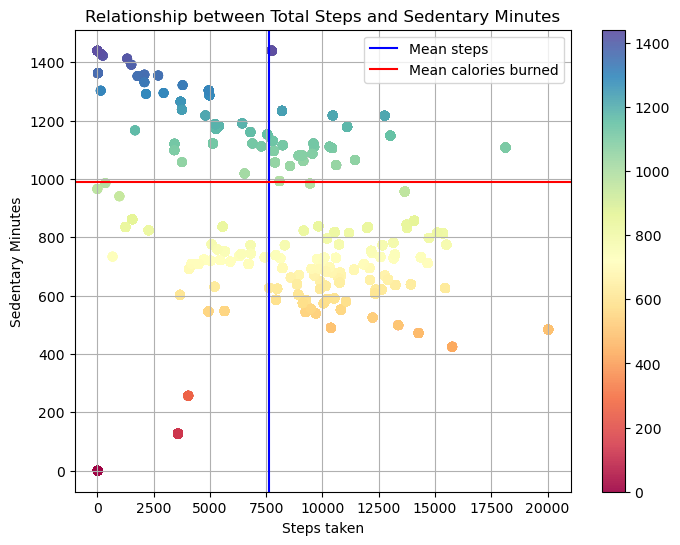

In [119]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(merged_data.total_steps, merged_data.sedentary_mins, 
            alpha = 0.8, c = merged_data.sedentary_mins, 
            cmap = "Spectral")

mean_total_steps = 7638
mean_calories = 991


plt.scatter(merged_data.total_steps,merged_data.sedentary_mins,alpha = 0.9, c = merged_data.sedentary_mins, 
            cmap = "Spectral")
plt.colorbar(orientation = "vertical")
plt.axvline(mean_total_steps, color = "Blue", label = "Mean steps")
plt.axhline(mean_calories, color = "Red", label = "Mean calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Sedentary Minutes")
plt.title("Relationship between Total Steps and Sedentary Minutes")
plt.grid(True)
plt.legend()
plt.show()

**Analysis**

**Total steps and Sedentary minutes**

1.  This graph shows a negative correlation between total steps and sedentary minutes 
2.   The lower the total steps, the higher the sedentary minutes.

### Less Sedentary Minutes on Saturday

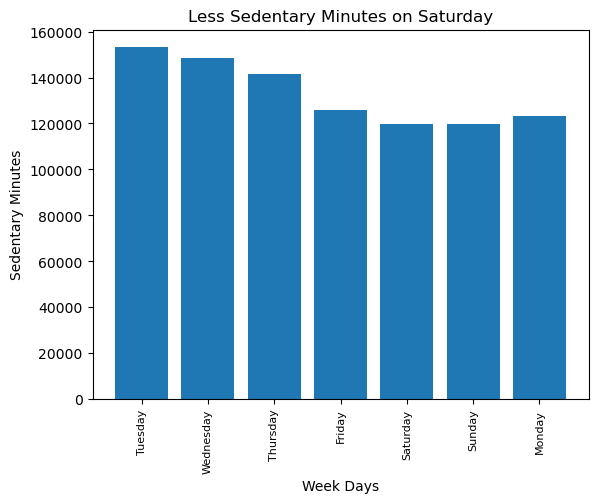

In [120]:
week_days = df_activity.groupby('day_of_the_Week',sort=False)

sedentary_mins = week_days.sum()['sedentary_mins']

days = [days for days, df in week_days]

plt.bar(days,sedentary_mins)
plt.xticks(days,rotation = 'vertical',size = 8)
plt.xlabel('Week Days')
plt.ylabel('Sedentary Minutes')
plt.title("Less Sedentary Minutes on Saturday")
plt.show()

**Analysis**

1. The bar graph shows that there is a jump on Saturday: user spent LESS time in sedentary minutes and took MORE steps. 

In [121]:
df_activity

,id,date,day_of_the_Week,total_steps,total_dist,tracker_dist,logged_activities_dist,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1040,17.0,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,1440,24.0,2847
936,8877689391,2016-05-09,Monday,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,1440,24.0,3710
937,8877689391,2016-05-10,Tuesday,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,1440,24.0,2832
938,8877689391,2016-05-11,Wednesday,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,1440,24.0,3832


### The Relationship Between Lightly Active Minutes and Calories Burned

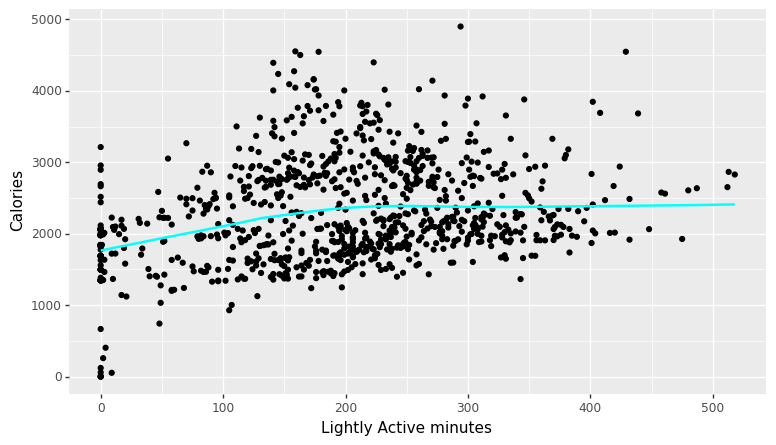

<ggplot: (180075535309)>

In [122]:
(
    ggplot(df_activity, aes(x='lightly_active_mins', y='calories'))
    + geom_point()
    + geom_smooth(color="cyan", se= False)
    + labs(x='Lightly Active minutes', y='Calories')
     + theme(figure_size = (9, 5))
    
)

### The Relationship Between Fairly Active Minutes and Calories Burned

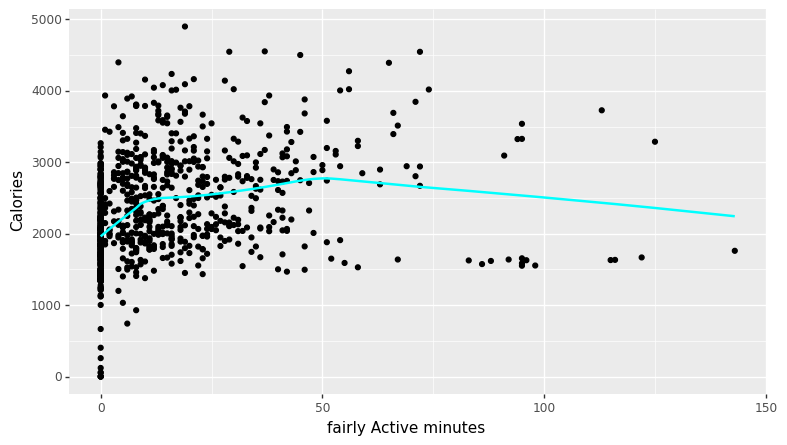

<ggplot: (180075500087)>

In [123]:
(
    ggplot(df_activity, aes(x='fairly_active_mins', y='calories'))
    + geom_point()
    + geom_smooth(color="cyan", se= False)
    + labs(x='fairly Active minutes', y='Calories')
     + theme(figure_size = (9, 5))
    
    
)

### The Relationship Between Very Active Minutes and Calories Burned

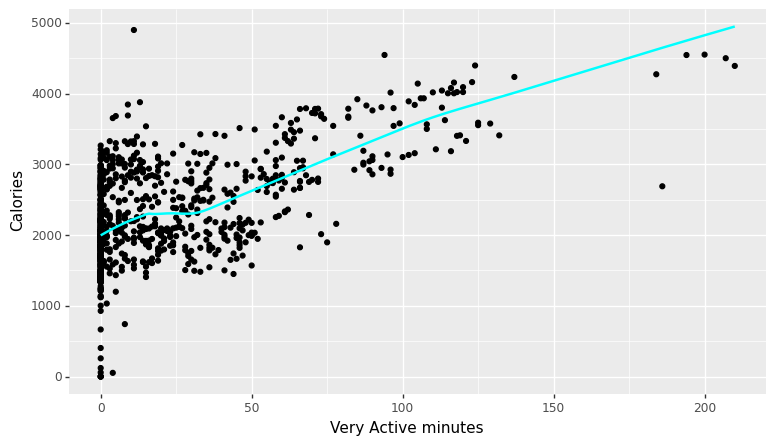

<ggplot: (180075441092)>

In [124]:
(
    ggplot(df_activity, aes(x='very_active_mins', y='calories'))
    + geom_point()
    + geom_smooth(color="cyan", se= False)
    + labs(x='Very Active minutes', y='Calories')
    + theme(figure_size = (9, 5))
    
)

**Analysis**

- **The Relationship Between Lightly Active Minutes and Calories Burned**

- **The Relationship Between Fairly Active Minutes and Calories Burned**

- **The Relationship Between Very Active Minutes and Calories Burned**



From these graphs


1. we can clearly see that there are positive relationships between very active minutes, and lightly active minutes’ against      the calories burned.


2. However, there seems to be a negative relationship between fairly active minutes and the number of calories burned.



3. We can also see that more calories were burned with people who did lighter activities compared to those who were very and/or    fairly active.

In [121]:
sleep_day

,id,date,day_of_the_Week,total_sleep_records,total_mins_asleep,total_time_inbed
0,1503960366,2016-04-12,Tuesday,1,327,346
1,1503960366,2016-04-13,Wednesday,2,384,407
2,1503960366,2016-04-15,Friday,1,412,442
3,1503960366,2016-04-16,Saturday,2,340,367
4,1503960366,2016-04-17,Sunday,1,700,712
...,...,...,...,...,...,...
408,8792009665,2016-04-30,Saturday,1,343,360
409,8792009665,2016-05-01,Sunday,1,503,527
410,8792009665,2016-05-02,Monday,1,415,423
411,8792009665,2016-05-03,Tuesday,1,516,545


### Relationship between Total time asleep and Total time in bed 

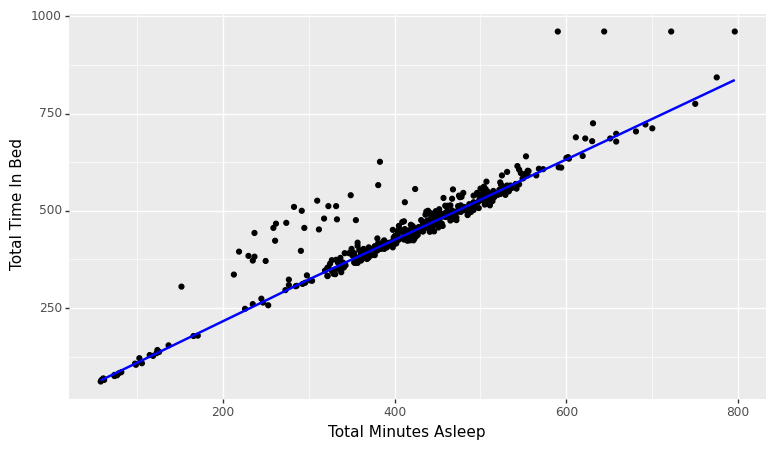

<ggplot: (99336077815)>

In [123]:
(
    ggplot(sleep_day, aes(x='total_mins_asleep', y='total_time_inbed'))
    + geom_point()
    + geom_smooth(color="blue", se= False)
    + labs(x='Total Minutes Asleep', y='Total Time In Bed')
    + theme(figure_size = (9, 5))
    
)

**Analysis**

**Relationship between total time asleep and total time in bed**

1. As you can see from the graph above, there is a positive correlation between the total minutes asleep and the amount of time    spent in bed.



2. Using this data, Bellabeat can use an app that notifies its customers about when it would be the right time to go to bed so    that they can get an adequate amount of sleep.

### Hourly Steps

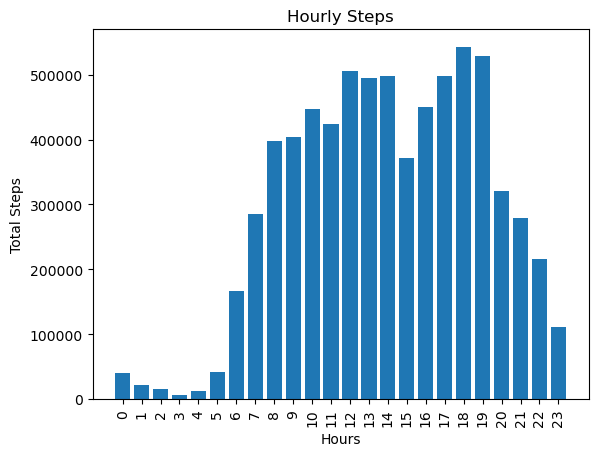

In [127]:
hours = hourly_steps.groupby('hour',sort=False)

StepTotal = hours.sum()['StepTotal']

hours = [hours for hours, df in hours]

plt.bar(hours,StepTotal)
plt.xticks(hours,rotation = 'vertical',size = 10)
plt.xlabel('Hours')
plt.ylabel('Total Steps')
plt.title("Hourly Steps")
plt.show()

**Analysis**


- From 5PM to 7PM the users take the most steps.